### 4-1．고객의 특성을 알자
#### 데이터의 리드와 확인

In [1]:
# Pandas의 로드
import pandas as pd

# 파일 리드
bank_df = pd.read_csv('bank-prep.csv', sep=',')

# 선두에서 5행까지 표시
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [2]:
# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

# 데이터 형을 확인
print(bank_df.dtypes)

(6933, 32)
age          int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
divorced     int64
married      int64
single       int64
primary      int64
secondary    int64
tertiary     int64
cellular     int64
telephone    int64
unknown      int64
apr          int64
aug          int64
dec          int64
feb          int64
jan          int64
jul          int64
jun          int64
mar          int64
may          int64
nov          int64
oct          int64
sep          int64
dtype: object


#### 데이터의 정규화

In [3]:
# MinMaxScaler의 로드
from sklearn.preprocessing import MinMaxScaler

# 데이터 세트에서 목적변수를 제외
bank_df = bank_df.drop('y', axis=1)

# 범위변환의 인스턴스를 생성
mc = MinMaxScaler()
mc.fit(bank_df)

# bank_df의 각항목을 정규화
bank_df_mc = pd.DataFrame(mc.transform(bank_df), columns=bank_df.columns)
bank_df_mc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.549296,0.0,0.064555,1.0,0.0,0.133333,0.077540,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.239437,0.0,0.042335,1.0,1.0,0.133333,0.103387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.084507,0.0,0.039116,1.0,0.0,0.133333,0.108437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.478873,0.0,0.039164,0.0,0.0,0.133333,0.494949,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.070423,0.0,0.037981,1.0,1.0,0.133333,0.043078,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
# StandardScaler의 로드
from sklearn.preprocessing import StandardScaler

# Z변환 인스턴스 생성
sc = StandardScaler()
sc.fit(bank_df)

# bank_df의 각항목을 정규화
bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns)
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073


In [5]:
# 각 항목의 평균과 표준편차를 확인
print(bank_df_sc.mean())
print(bank_df_sc.std())

age         -3.085501e-16
default     -2.955983e-15
balance      8.058845e-17
housing      1.263524e-14
loan        -6.665694e-15
day         -1.745907e-15
duration     5.929837e-17
campaign     4.521945e-15
pdays        2.224701e-14
previous     1.160586e-15
divorced     1.641971e-15
married     -1.653693e-15
single      -1.133763e-15
primary     -2.040037e-15
secondary    2.141291e-15
tertiary     1.623955e-15
cellular     7.350275e-15
telephone    9.604558e-15
unknown     -3.957336e-14
apr         -3.182223e-16
aug         -7.228092e-15
dec          1.448650e-15
feb         -1.088728e-14
jan         -9.445567e-15
jul          1.463856e-14
jun         -6.843317e-15
mar         -2.591381e-15
may          9.057037e-15
nov          6.118989e-15
oct         -1.769291e-14
sep         -6.114746e-15
dtype: float64
age          1.000072
default      1.000072
balance      1.000072
housing      1.000072
loan         1.000072
day          1.000072
duration     1.000072
campaign     1.000072
pda

### 4-3．잠재적인 니즈의 추출
#### 주성분 분석

In [6]:
# PCA의 로드
from sklearn.decomposition import PCA

# 주성분을 누적기여율 80% 까지 추출
pca = PCA(0.80)
bank_df_pca = pca.fit_transform(bank_df_sc)

# 주성분을 확인
print(pca.n_components_)

# 차원압축한 데이터 세트의 사이즈 확인
print(bank_df_pca.shape)

18
(6933, 18)


In [7]:
# 파일에서 목적변수만 리드
y = pd.read_csv('bank-prep.csv', sep=',')['y']

# 데이터 세트에 y를 추가
bank_df_pca = pd.DataFrame(bank_df_pca)
bank_df_pca['y'] = y

# 데이터 세트의 사이즈를 확인
print(bank_df_pca.shape)

(6933, 19)


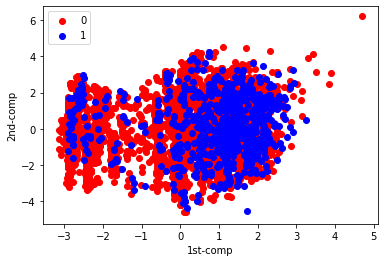

In [8]:
# Matplotlib의 로드
import matplotlib.pyplot as plt
%matplotlib inline

# y=0의 제1주성분과 제2주성분을 작성
bank_df_pca_0 = bank_df_pca[bank_df_pca['y'] == 0]
bank_df_pca_0 = bank_df_pca_0.drop('y', axis=1)
plt.scatter(bank_df_pca_0[0], bank_df_pca_0[1], c='red', label=0)

# y=1의 제1주성분과 제2성분을 작성
bank_df_pca_1 = bank_df_pca[bank_df_pca['y'] == 1]
bank_df_pca_1 = bank_df_pca_1.drop('y', axis=1)
plt.scatter(bank_df_pca_1[0], bank_df_pca_1[1], c='blue', label=1)

plt.legend()
plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.show()